# Linear Regression 

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data for training and testing

In [2]:
fname_data  = 'assignment_07_data.csv'

data        = np.genfromtxt(fname_data, delimiter=',')
num_data    = data.shape[0]

xx          = np.zeros(num_data)
yy          = np.zeros(num_data)
zz          = np.zeros(num_data)

for i in range(num_data):

    xx[i] = data[i,0]
    yy[i] = data[i,1]
    zz[i] = data[i,2]

## plot the data in the three dimensional space

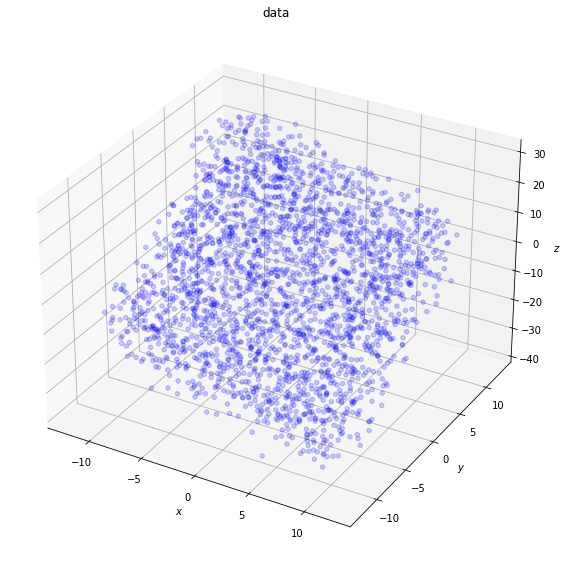

In [3]:
fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot(111, projection='3d')
plt.title('data')

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')

ax1.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)

plt.tight_layout()
plt.show()

## compute the loss function

In [4]:
def compute_residual(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    num_data=len(x)
    residual=np.zeros(num_data)
    for i in range(num_data):
        mul=np.array((1,x[i],y[i]))
        residual[i]=z[i]-np.sum(theta*mul)
    # ============================
    return residual, num_data

In [5]:
def compute_loss(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    residual,num_data=compute_residual(theta,x,y,z)
    loss=np.sum(residual**2)/(2*num_data)
    # ============================
    return loss

## compute the gradient for each model parameter (DO NOT COMPUTE THE GRADIENT FOR EACH MODEL PARAMETER, BUT DO COMPUTE THE GRADIENT OF THE MODEL PARAMTER VECTOR)

In [6]:
def compute_gradient(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    residual, num_data=compute_residual(theta,x,y,z)
    multi=np.zeros((num_data,3))
    for i in range(num_data):
        multi[i]=np.array((-1,-x[i],-y[i]))
    grad=np.dot(multi.transpose(),residual)
    grad=grad/(2*num_data)
    # ============================
    return grad

## gradient descent for each model parameter

In [7]:
num_iteration   = 1000
learning_rate   = 0.01

theta           = np.array((0, 0, 0))
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration)

for i in range(num_iteration):
    # ===== FILL UP THE CODE =====
    theta1=theta-learning_rate*compute_gradient(theta,xx,yy,zz)
    loss=compute_loss(theta,xx,yy,zz)
    theta_iteration[i]=theta
    loss_iteration[i]=loss
    theta=theta1
    # ============================
    print("iteration = %4d, loss = %5.5f" % (i, loss))

8
iteration =  394, loss = 7.20850
iteration =  395, loss = 7.20763
iteration =  396, loss = 7.20678
iteration =  397, loss = 7.20592
iteration =  398, loss = 7.20508
iteration =  399, loss = 7.20425
iteration =  400, loss = 7.20342
iteration =  401, loss = 7.20260
iteration =  402, loss = 7.20179
iteration =  403, loss = 7.20099
iteration =  404, loss = 7.20020
iteration =  405, loss = 7.19941
iteration =  406, loss = 7.19864
iteration =  407, loss = 7.19787
iteration =  408, loss = 7.19710
iteration =  409, loss = 7.19635
iteration =  410, loss = 7.19560
iteration =  411, loss = 7.19486
iteration =  412, loss = 7.19413
iteration =  413, loss = 7.19340
iteration =  414, loss = 7.19269
iteration =  415, loss = 7.19198
iteration =  416, loss = 7.19127
iteration =  417, loss = 7.19058
iteration =  418, loss = 7.18989
iteration =  419, loss = 7.18920
iteration =  420, loss = 7.18853
iteration =  421, loss = 7.18786
iteration =  422, loss = 7.18720
iteration =  423, loss = 7.18654
iteratio

In [8]:
f = theta[0] + theta[1] * xx + theta[2] * yy

## plot the results

In [9]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss')
    # ===== FILL UP THE CODE =====
    plt.plot(range(len(loss_iteration)),loss_iteration,'r-')

    # ============================
    plt.tight_layout()
    plt.show()

In [10]:
def plot_data(xx, yy, zz):
    
    fig = plt.figure(figsize=(12, 8))
    ax  = plt.subplot(111, projection='3d')
    plt.title('data')
    # ===== FILL UP THE CODE =====
    plt.plot(xx,yy,zz,'bo')
    # ============================    
    plt.tight_layout()
    plt.show()

In [11]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    # ===== FILL UP THE CODE =====
    plt.plot(range(len(theta_iteration)), theta_iteration.transpose()[0],'r-',
             range(len(theta_iteration)), theta_iteration.transpose()[1],'g-',
             range(len(theta_iteration)), theta_iteration.transpose()[2],'b-')
    # ============================
    plt.tight_layout()
    plt.show()

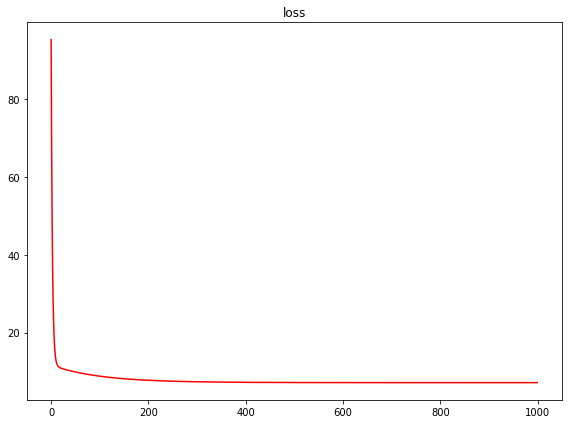

In [12]:
plot_loss_curve(loss_iteration)

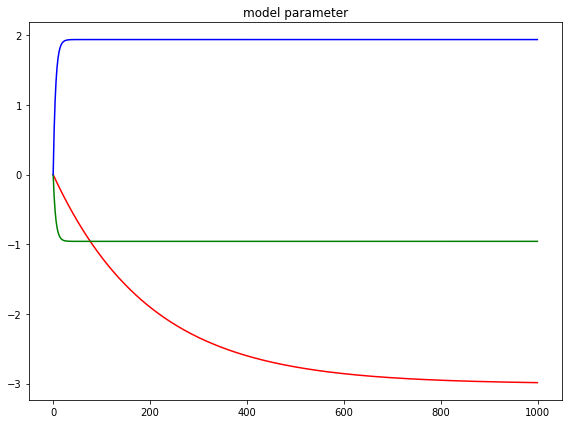

In [13]:
plot_model_parameter(theta_iteration)

In [14]:
# ===== FILL UP THE CODE =====
x0 = np.arange(-10,10,0.1)
x1 = np.arange(-10,10,0.1)
XX,YY=np.meshgrid(x0,x1)
ZZ=np.zeros((len(XX),len(YY)))
thetax=np.array((theta[0],theta[1],theta[2]))
for i in range(len(XX)):
    for j in range(len(YY)):     
        mul=np.array((1,XX[0][j],YY[i][0]))
        ZZ[i,j]=np.sum(thetax*mul)
print(ZZ)
# ============================

def plot_surface(XX, YY, ZZ, xx, yy, zz):

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111, projection='3d')
    plt.title('loss surface')

    ax  = plt.axes(projection='3d')
    # ===== FILL UP THE CODE =====
    ax.plot_wireframe(XX,YY,ZZ,color='black')
    ax.plot(xx,yy,zz,'bo')
    # ============================
    plt.tight_layout()
    plt.show()

[[-12.79650188 -12.89232464 -12.98814741 ... -31.6735872  -31.76940996
  -31.86523273]
 [-12.60258654 -12.69840931 -12.79423208 ... -31.47967186 -31.57549463
  -31.6713174 ]
 [-12.4086712  -12.50449397 -12.60031674 ... -31.28575652 -31.38157929
  -31.47740206]
 ...
 [ 25.40481928  25.30899651  25.21317374 ...   6.52773396   6.43191119
    6.33608842]
 [ 25.59873462  25.50291185  25.40708908 ...   6.72164929   6.62582653
    6.53000376]
 [ 25.79264995  25.69682718  25.60100441 ...   6.91556463   6.81974186
    6.72391909]]


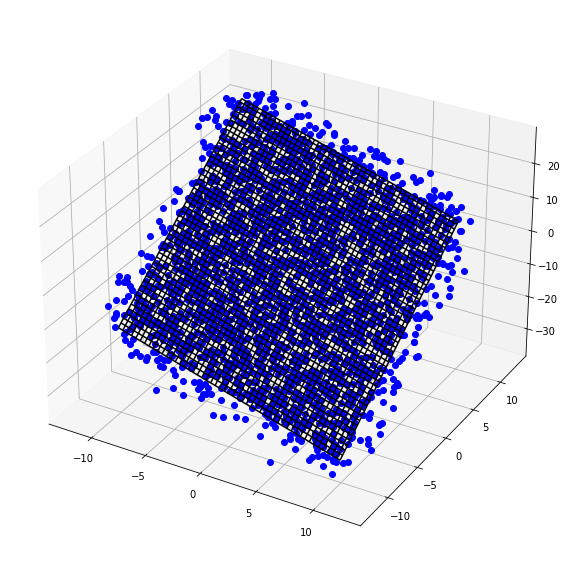

In [15]:
plot_surface(XX, YY, ZZ, xx, yy, zz)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point in 3-dimensional space

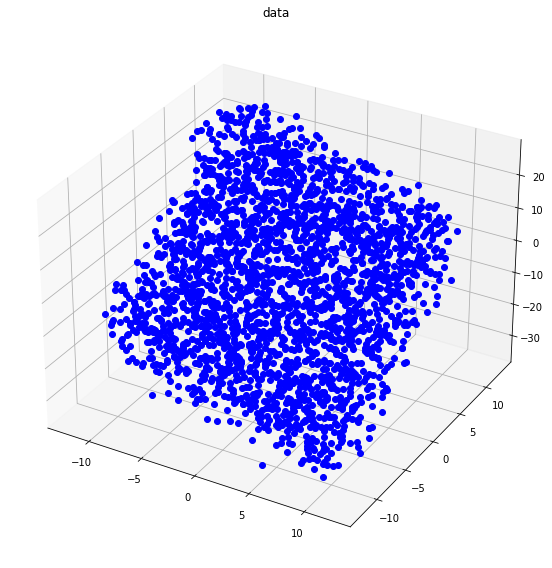

In [16]:
plot_data(xx, yy, zz)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

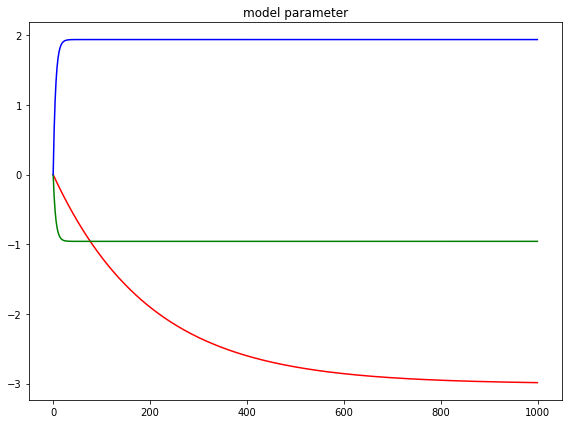

In [17]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

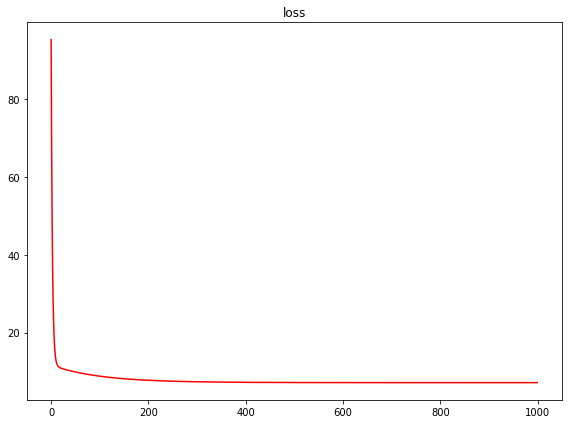

In [18]:
plot_loss_curve(loss_iteration)

### # 04. plot the optimal regression surface $\hat{f}(\theta^*)$ in 3-dimensional space with a given set of data points superimposed

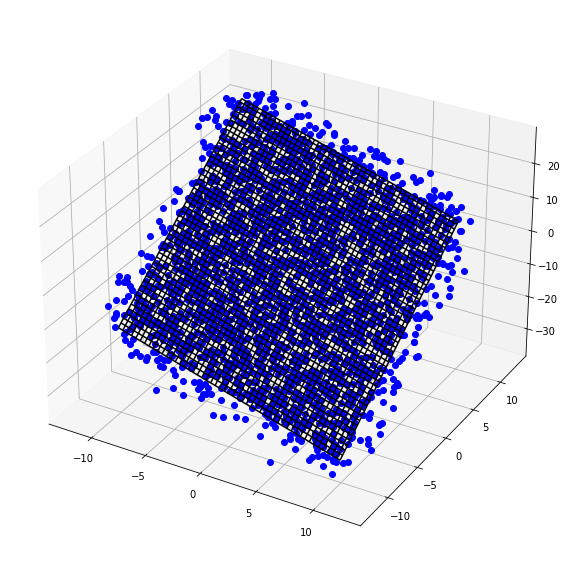

In [19]:
plot_surface(XX, YY, ZZ, xx, yy, zz)